# Image Processing using Skimage

In [1]:
import matplotlib.pyplot as plt


def show_image(image, title="Image", cmap_type="gray"):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis("off")
    plt.show()

In [2]:
import matplotlib.pyplot as plt


def plot_hist(image, thresh):
    plt.hist(image.ravel(), bins=256)
    plt.axvline(thresh, color="r")
    plt.title("Histogram")
    plt.show()

In [3]:
import matplotlib.pyplot as plt


def plot_comparison(
    original, filtered, title_filtered, title_original="Original", sz=(10, 8)
):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=sz, sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title(title_original)
    ax1.axis("off")
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis("off")

## 1. Visualizing image of rocket

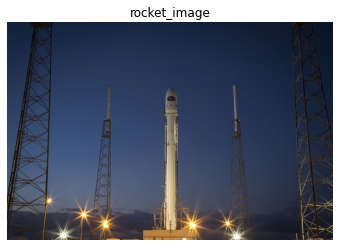

In [4]:
from skimage import data
import numpy as np

rocket_image = data.rocket()
show_image(rocket_image, "rocket_image")

## 2. Converting to grayscale and flipping the image

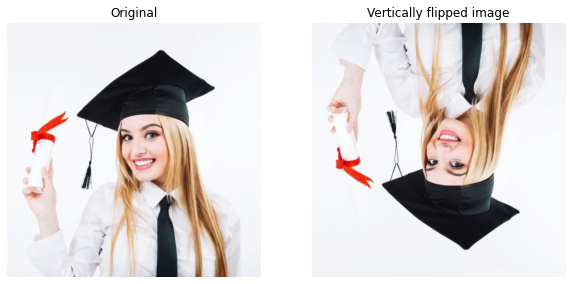

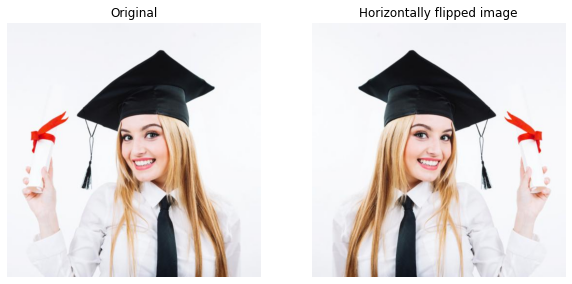

In [5]:
from skimage import color

image = plt.imread("images/jasmine.jpg")
grayscale = color.rgb2gray(image)
# Vertically flipped image
vertically_flipped = np.flipud(image)
plot_comparison(image, vertically_flipped, "Vertically flipped image")
# show_image(vertically_flipped, "Vertically flipped image")

# Horizontally flipped image
horizontally_flipped = np.fliplr(image)
plot_comparison(image, horizontally_flipped, "Horizontally flipped image")
# show_image(horizontally_flipped, "Horizontally flipped image")

## 3. Histogram of an image
- Analysis
- Thresholding
- Brightness and contrast
- Equalize an image

*From the following image's histogram we can tell that it has variety of shades of red*

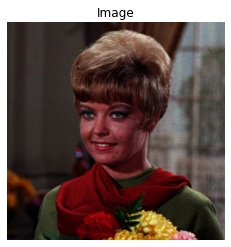

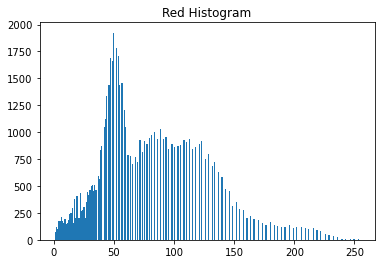

In [6]:
image = plt.imread(r"images/hannah.tiff")
show_image(image)
red = image[:, :, 0]
plt.hist(red.ravel(), bins=256)
plt.title("Red Histogram")
plt.show()

## 4. Thresholding
- Partitioning an image into a foreground and background
- By making it black and white
- We do so by setting each pixel to:
    - 255 (white) if pixel > thresh value
    - 0 (black) if pixel < thresh value

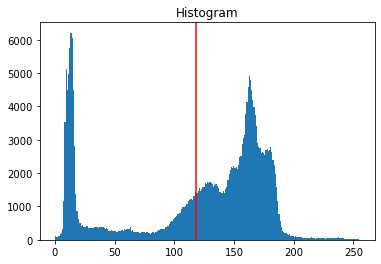

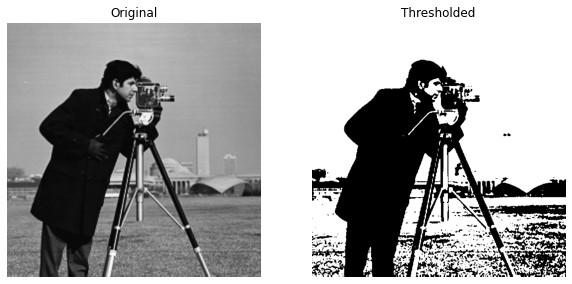

In [7]:
from skimage.filters import threshold_mean

image = data.camera()
# Obtain the optimal threshold value
# thresh = (np.max(grayscale) - np.min(grayscale)) / 2
thresh = threshold_mean(image)

# Apply thresholding to the image
binary = image > thresh

# Show the original and thresholded
# show_image(image, "Original")
# show_image(binary, "Thresholded")
plot_hist(image, thresh)
plot_comparison(image, binary, "Thresholded")

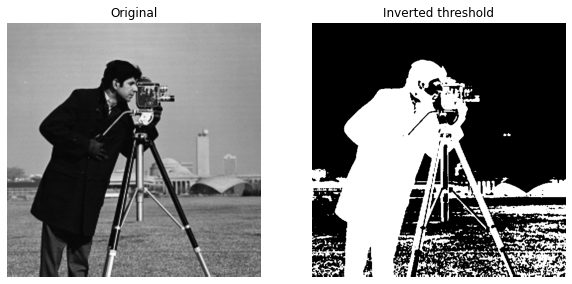

In [8]:
image = data.camera()

# Apply thresholding to the image
inverted_binary = image <= thresh

# Show the original and thresholded
# show_image(image, "Original")
# show_image(inverted_binary, "Inverted thresholded")
plot_comparison(image, inverted_binary, "Inverted threshold")

## Categories of thresholding
- Global or histogram based: good for uniform backgrounds
- Local or adaptive: for uneven background illumination

## 4.1 Global (Uniform background) 

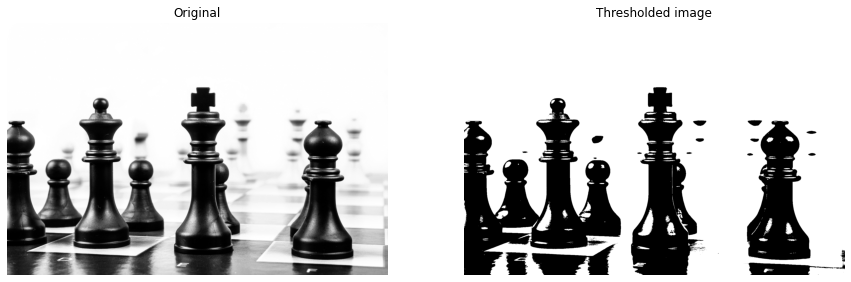

In [9]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu

chess_pieces_image = plt.imread("images/chess_pieces.jpg")
# Make the image grayscale using rgb2gray
chess_pieces_image_gray = color.rgb2gray(chess_pieces_image)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image
binary = chess_pieces_image_gray > thresh

# Show the image
plot_comparison(chess_pieces_image_gray, binary, "Thresholded image", sz=(15, 10))

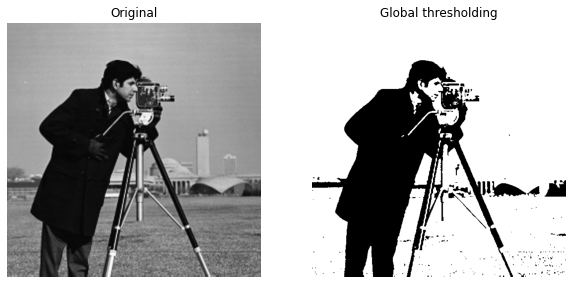

In [10]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu

image = data.camera()
# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(image)

# Obtain the binary image by applying global thresholding
binary_global = image > global_thresh

# Show the binary image obtained
plot_comparison(image, binary_global, "Global thresholding")
# show_image(binary_global, "Global thresholding")
# plot_hist(image, thresh)

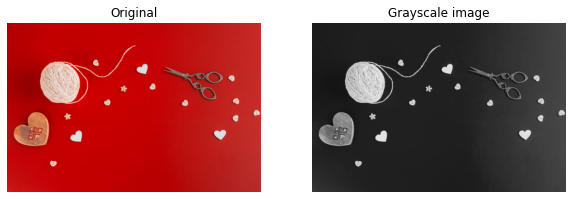

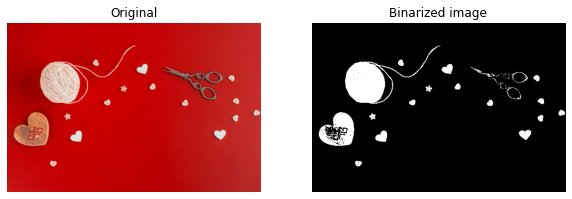

In [11]:
tools_image = plt.imread("images/tools_image.jpg")
# show_image(tools_image, "tools_image")
# Import threshold and gray convertor functions
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# Turn the image grayscale
gray_tools_image = rgb2gray(tools_image)
# show_image(gray_tools_image, "gray_tools_image")
plot_comparison(tools_image, gray_tools_image, "Grayscale image")

# Obtain the optimal thresh
thresh = threshold_otsu(gray_tools_image)

# Obtain the binary image by applying thresholding
binary_image = gray_tools_image > thresh

# Show the resulting binary image
# show_image(binary_image, "Binarized image")
plot_comparison(tools_image, binary_image, "Binarized image")

## 4.2 Local (Uneven background)

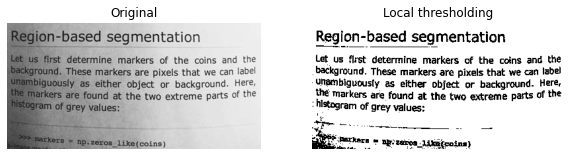

In [12]:
# Import the local threshold function
from skimage.filters import threshold_local

page = data.page()
# show_image(page, "Original Image")
# Set the block size to 35
block_size = 185

# Obtain the optimal local thresholding
local_thresh = threshold_local(page, block_size, offset=10)
# Obtain the binary image by applying local thresholding
binary_local = page > local_thresh

# Show the binary image
# show_image(binary_local, "Local thresholding")
plot_comparison(page, binary_local, "Local thresholding")

## 4.3 Trying out different thresholding algorithms

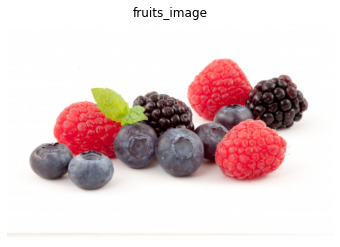

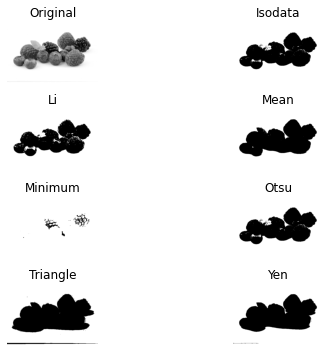

In [13]:
fruits_image = plt.imread("images/fruits_image.jpg")
show_image(fruits_image, "fruits_image")
# Import the try all function
from skimage.filters import try_all_threshold

# Import the rgb to gray convertor function
from skimage.color import rgb2gray

# Turn the fruits_image to grayscale
grayscale = rgb2gray(fruits_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False)

# Show the resulting plots
plt.show()
# Yen and mean are best so far